<a href="https://colab.research.google.com/github/jkbolivar/jkbolivar/blob/main/project_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
url='https://raw.githubusercontent.com/terranigmark/curso-analisis-exploratorio-datos-platzi/main/train_titanic.csv'


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
titanic_data_set = pd.read_csv(url,error_bad_lines=False )

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
titanic_data_set.shape

(891, 12)

In [22]:
#missing data 
total = titanic_data_set.isnull().sum().sort_values(ascending=False)

In [23]:
#Survived Women percentages
women = titanic_data_set.loc[titanic_data_set.Sex == 'female']['Survived']
rate_women = sum(women/len(women))

In [25]:
#Survived men percentages
men = titanic_data_set.loc[titanic_data_set.Sex == 'male']['Survived']
rate_men = sum(men/len(men))

In [26]:
#total survival
titanic_data_set['Survived']=titanic_data_set['Survived'].map({0:'not_survived',1:'survived'})

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


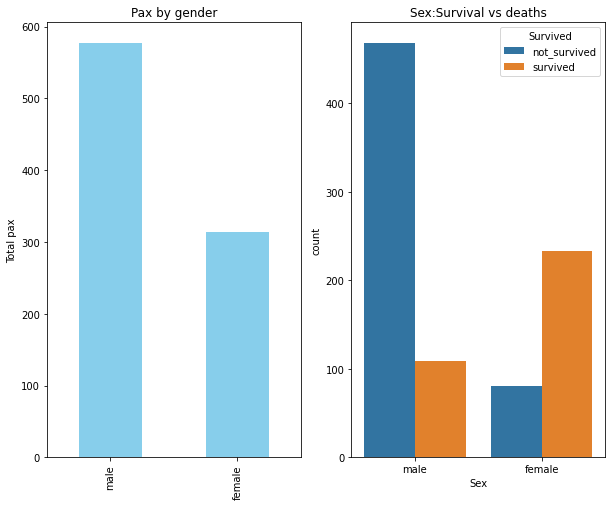

In [30]:
#Graph total pax by gender / survived by gender
fig, ax = plt.subplots(1,2,figsize=(10,8))
titanic_data_set['Sex'].value_counts().plot.bar(color='skyblue', ax=
ax[0])
ax[0].set_title('Pax by gender')
ax[0].set_ylabel('Total pax')
sns.countplot("Sex", hue = "Survived", data = titanic_data_set, ax = ax[1])
ax[1].set_title('Sex:Survival vs deaths' )
plt.show()

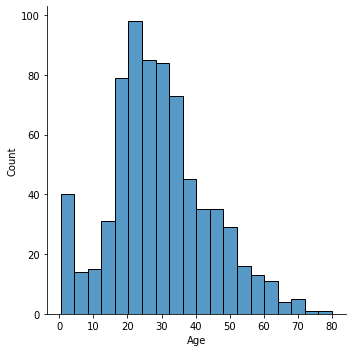

In [31]:
#Age distribution
sns.displot(titanic_data_set['Age'].dropna())

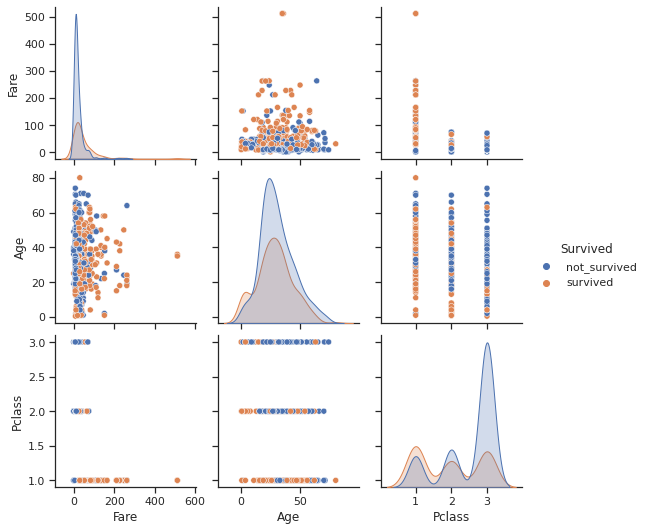

In [32]:
sns.set(style ='ticks', color_codes=True)
sns.pairplot(titanic_data_set,vars=['Fare','Age','Pclass'],
hue='Survived')
plt.show()

In [33]:
titanic_data_set['Embarked']=titanic_data_set['Embarked'].map({"s":1,
"C":2, "Q":2,"NAN":0})
Tcorrelation = titanic_data_set.corr(method='pearson')
Tcorrelation

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.035144,0.036847,-0.057527,-0.001652,0.012658,NaN
Pclass,-0.035144,1.000000,-0.369226,0.083081,0.018443,-0.549500,NaN
Age,0.036847,-0.369226,1.000000,-0.308247,-0.189119,0.096067,NaN
SibSp,-0.057527,0.083081,-0.308247,1.000000,0.414838,0.159651,NaN
Parch,-0.001652,0.018443,-0.189119,0.414838,1.000000,0.216225,NaN
Fare,0.012658,-0.549500,0.096067,0.159651,0.216225,1.000000,NaN
Embarked,NaN,NaN,NaN,NaN,NaN,NaN,NaN


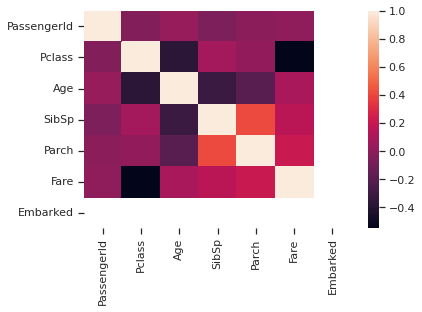

In [34]:
sns.heatmap(Tcorrelation,xticklabels=Tcorrelation.columns,yticklabels=Tcorrelation.columns)